In [28]:
import pandas as pd

# Load the CSV file
file_path = '2024_08_21_03:44.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,src,compiler_time,gcc_o3_time,speedup
0,../test/2024/performance/01_mm1.sy,2.037523,7.728184,3.793
1,../test/2024/performance/01_mm2.sy,1.821903,6.852598,3.761
2,../test/2024/performance/01_mm3.sy,1.367061,5.172701,3.784
3,../test/2024/performance/03_sort1.sy,1.600729,0.376539,0.235
4,../test/2024/performance/03_sort2.sy,44.365252,7.843181,0.177


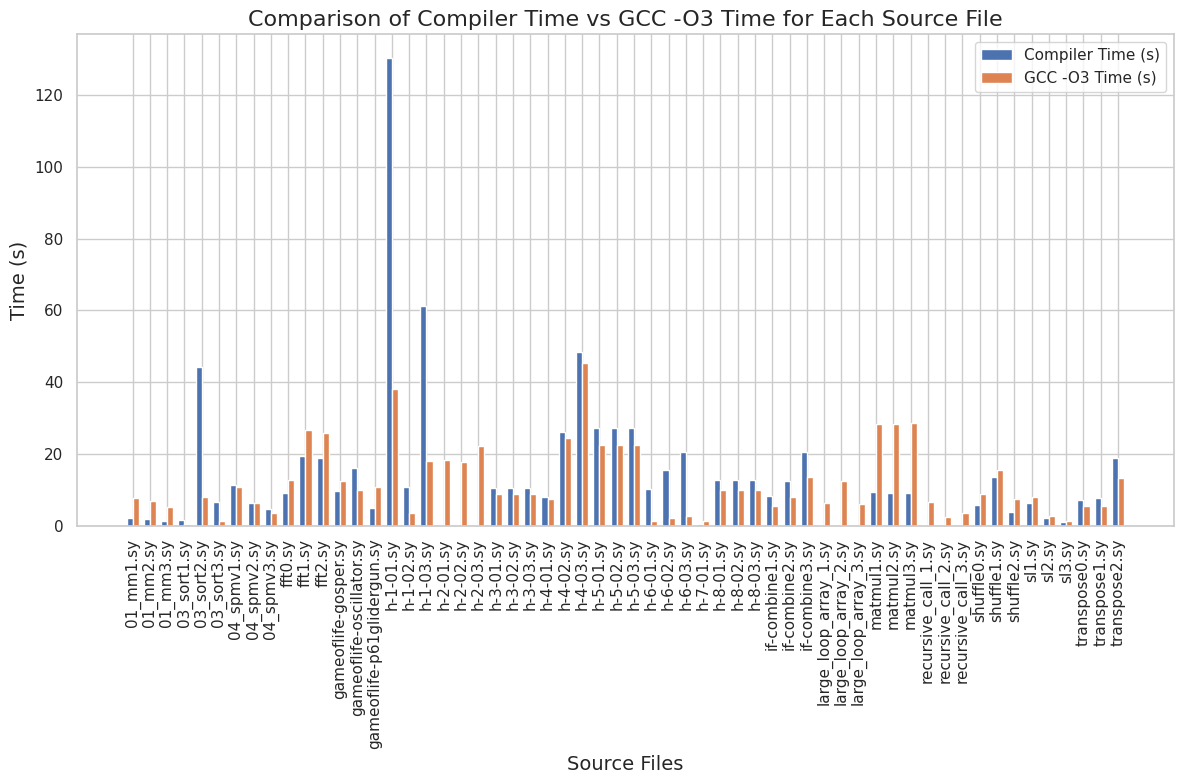

In [29]:
import matplotlib.pyplot as plt

# Extract the file names from the 'src' column for better readability in the plot
data['file_name'] = data['src'].apply(lambda x: x.split('/')[-1])

# Set up the bar width and positions
bar_width = 0.35
index = range(len(data))

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(index, data['compiler_time'], bar_width, label='Compiler Time (s)')
plt.bar([i + bar_width for i in index], data['gcc_o3_time'], bar_width, label='GCC -O3 Time (s)')

# Add labels and title
plt.xlabel('Source Files', fontsize=14)
plt.ylabel('Time (s)', fontsize=14)
plt.title('Comparison of Compiler Time vs GCC -O3 Time for Each Source File', fontsize=16)
plt.xticks([i + bar_width / 2 for i in index], data['file_name'], rotation=90)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


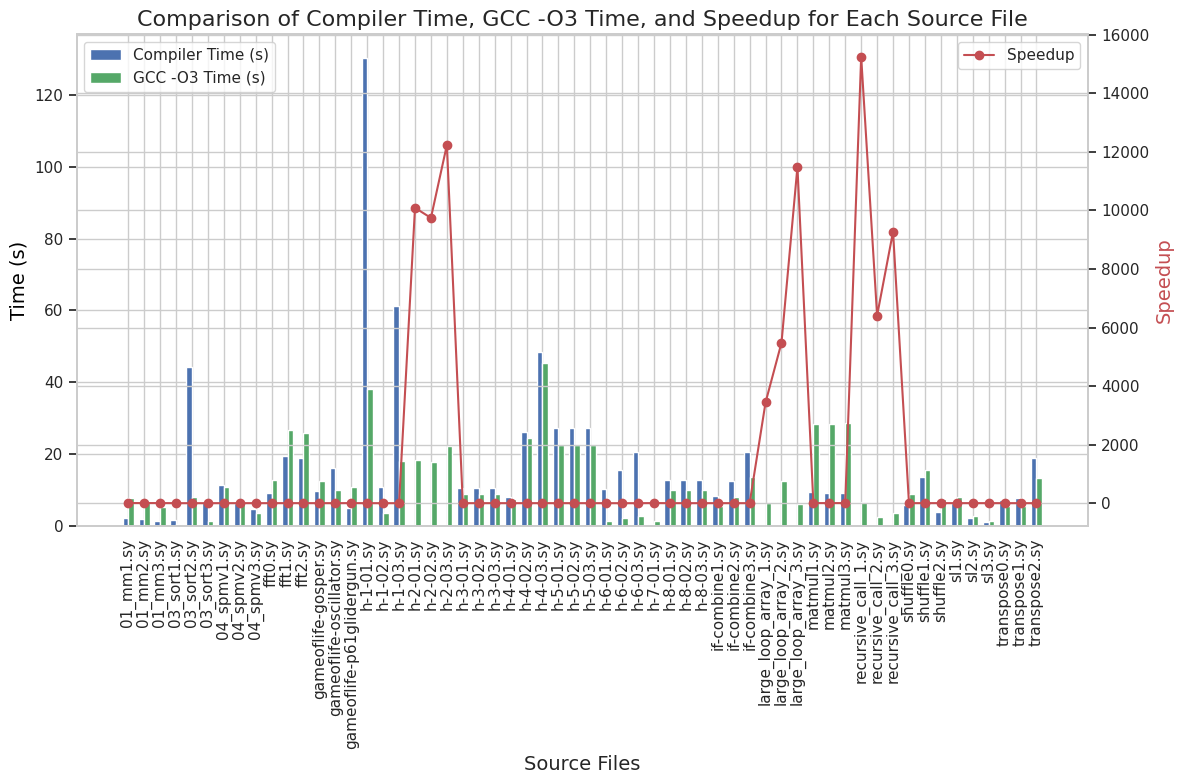

In [30]:
# Create the bar plot with a secondary axis for speedup
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plots for compiler_time and gcc_o3_time
ax1.bar(index, data['compiler_time'], bar_width, label='Compiler Time (s)', color='b')
ax1.bar([i + bar_width for i in index], data['gcc_o3_time'], bar_width, label='GCC -O3 Time (s)', color='g')

# Labels and title for the primary y-axis (Time)
ax1.set_xlabel('Source Files', fontsize=14)
ax1.set_ylabel('Time (s)', fontsize=14, color='black')
ax1.set_title('Comparison of Compiler Time, GCC -O3 Time, and Speedup for Each Source File', fontsize=16)
ax1.set_xticks([i + bar_width / 2 for i in index])
ax1.set_xticklabels(data['file_name'], rotation=90)
ax1.legend(loc='upper left')

# Create a secondary y-axis for the speedup
ax2 = ax1.twinx()
ax2.plot([i + bar_width / 2 for i in index], data['speedup'], label='Speedup', color='r', marker='o')
ax2.set_ylabel('Speedup', fontsize=14, color='r')
ax2.legend(loc='upper right')

# Display the combined plot
plt.tight_layout()
plt.show()


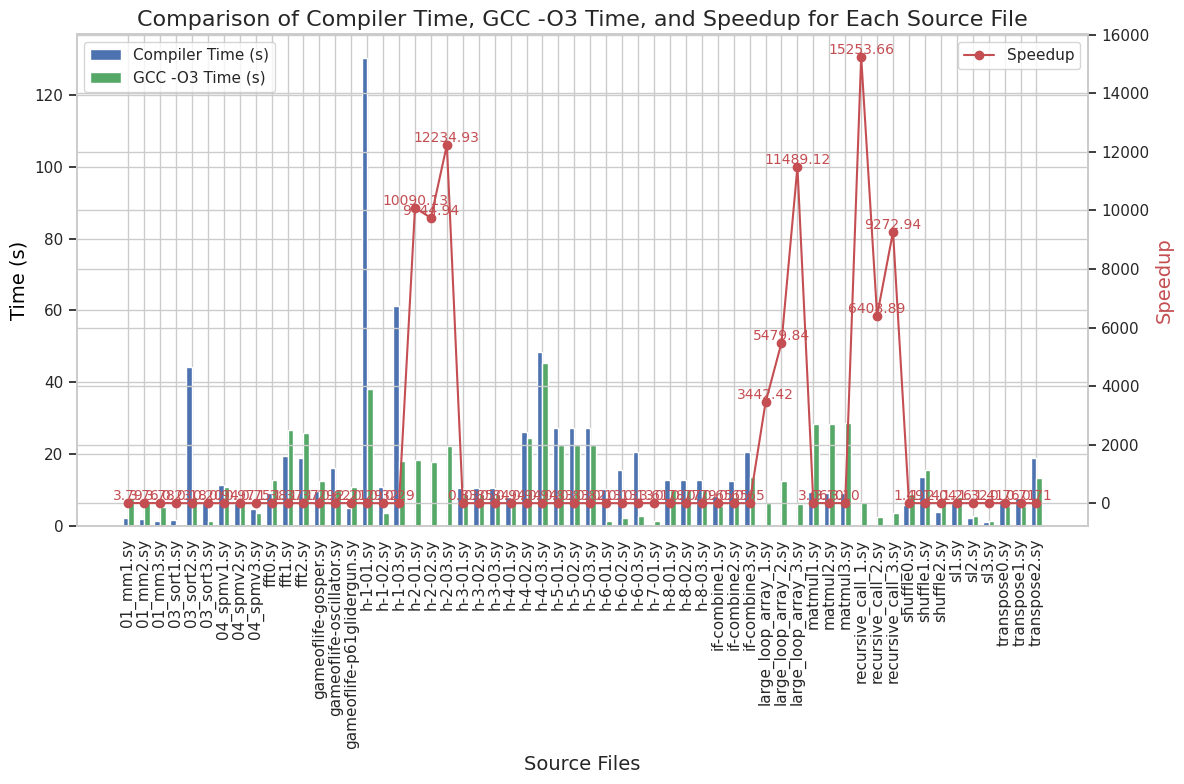

In [31]:
# Create the bar plot with a secondary axis for speedup
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plots for compiler_time and gcc_o3_time
ax1.bar(index, data['compiler_time'], bar_width, label='Compiler Time (s)', color='b')
ax1.bar([i + bar_width for i in index], data['gcc_o3_time'], bar_width, label='GCC -O3 Time (s)', color='g')

# Labels and title for the primary y-axis (Time)
ax1.set_xlabel('Source Files', fontsize=14)
ax1.set_ylabel('Time (s)', fontsize=14, color='black')
ax1.set_title('Comparison of Compiler Time, GCC -O3 Time, and Speedup for Each Source File', fontsize=16)
ax1.set_xticks([i + bar_width / 2 for i in index])
ax1.set_xticklabels(data['file_name'], rotation=90)
ax1.legend(loc='upper left')

# Create a secondary y-axis for the speedup
ax2 = ax1.twinx()
ax2.plot([i + bar_width / 2 for i in index], data['speedup'], label='Speedup', color='r', marker='o')

# Add speedup values as labels on each point
for i, v in enumerate(data['speedup']):
    ax2.text(i + bar_width / 2, v, f"{v:.2f}", color='r', fontsize=10, ha='center', va='bottom')

ax2.set_ylabel('Speedup', fontsize=14, color='r')
ax2.legend(loc='upper right')

# Display the combined plot
plt.tight_layout()
plt.show()



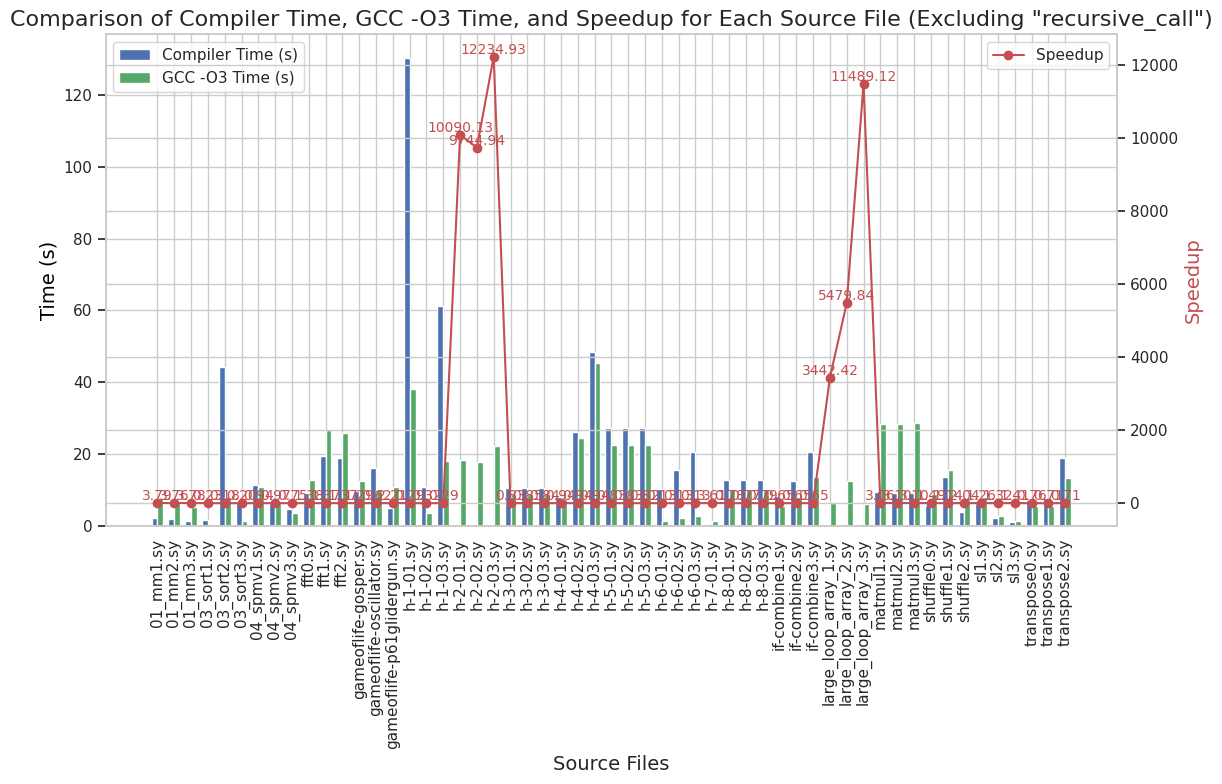

In [32]:
# Filter out rows where the src name starts with "recursive_call"
filtered_data = data[~data['file_name'].str.startswith("recursive_call")]

# Update the index for plotting
filtered_index = range(len(filtered_data))

# Create the bar plot with a secondary axis for speedup
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plots for compiler_time and gcc_o3_time
ax1.bar(filtered_index, filtered_data['compiler_time'], bar_width, label='Compiler Time (s)', color='b')
ax1.bar([i + bar_width for i in filtered_index], filtered_data['gcc_o3_time'], bar_width, label='GCC -O3 Time (s)', color='g')

# Labels and title for the primary y-axis (Time)
ax1.set_xlabel('Source Files', fontsize=14)
ax1.set_ylabel('Time (s)', fontsize=14, color='black')
ax1.set_title('Comparison of Compiler Time, GCC -O3 Time, and Speedup for Each Source File (Excluding "recursive_call")', fontsize=16)
ax1.set_xticks([i + bar_width / 2 for i in filtered_index])
ax1.set_xticklabels(filtered_data['file_name'], rotation=90)
ax1.legend(loc='upper left')

# Create a secondary y-axis for the speedup
ax2 = ax1.twinx()
ax2.plot([i + bar_width / 2 for i in filtered_index], filtered_data['speedup'], label='Speedup', color='r', marker='o')

# Add speedup values as labels on each point
for i, v in enumerate(filtered_data['speedup']):
    ax2.text(i + bar_width / 2, v, f"{v:.2f}", color='r', fontsize=10, ha='center', va='bottom')

ax2.set_ylabel('Speedup', fontsize=14, color='r')
ax2.legend(loc='upper right')

# Display the combined plot
plt.tight_layout()
plt.show()


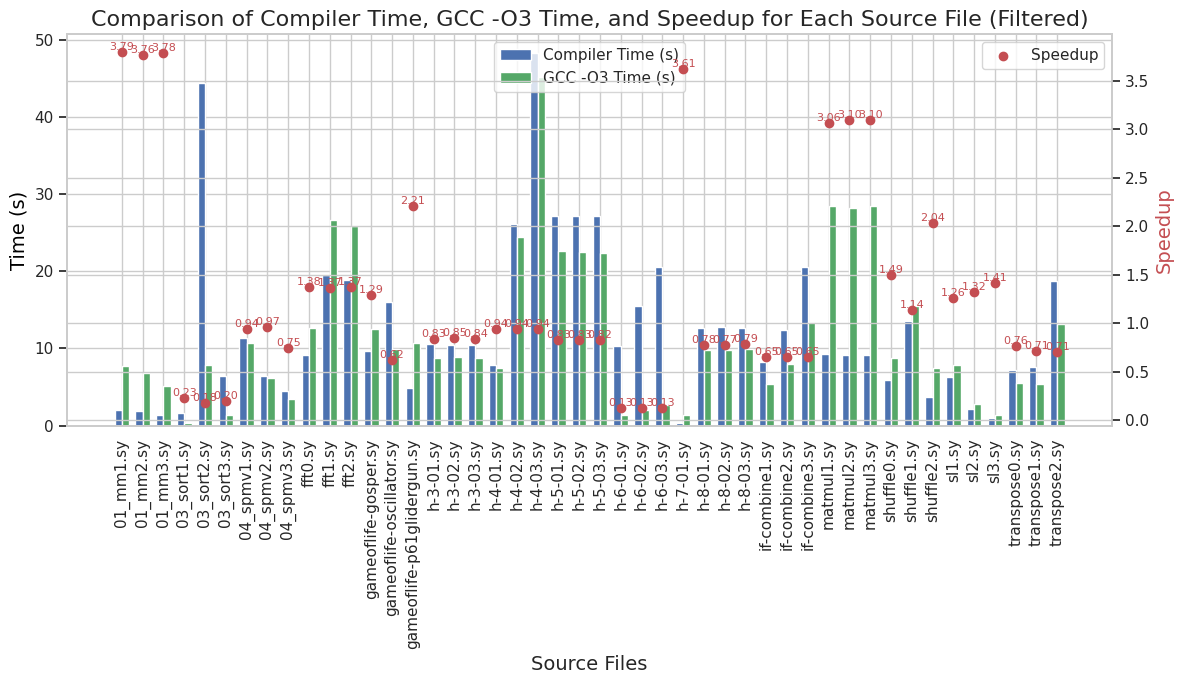

In [54]:
# Filter out rows with src names starting with "recursive_call", "h1-", etc.
excluded_prefixes = ["recursive_call", "h-1", "h-2", "large"]
included_prefixes = ["01_mm", "matmul", "h-7"]
# Keep only the rows where the file_name does not start with the excluded prefixes
filtered_data = data[~data['file_name'].str.startswith(tuple(excluded_prefixes))]
# filtered_data = filtered_data[filtered_data['file_name'].str.startswith(tuple(included_prefixes))]
# Update indices for plotting
filtered_index = range(len(filtered_data))

# Create the bar plot with a secondary axis for speedup
fig, ax1 = plt.subplots(figsize=(12, 7))

# Bar plots for compiler_time and gcc_o3_time
ax1.bar(filtered_index, filtered_data['compiler_time'], bar_width, label='Compiler Time (s)', color='b')
ax1.bar([i + bar_width for i in filtered_index], filtered_data['gcc_o3_time'], bar_width, label='GCC -O3 Time (s)', color='g')

# Labels and title for the primary y-axis (Time)
ax1.set_xlabel('Source Files', fontsize=14)
ax1.set_ylabel('Time (s)', fontsize=14, color='black')
ax1.set_title('Comparison of Compiler Time, GCC -O3 Time, and Speedup for Each Source File (Filtered)', fontsize=16)
ax1.set_xticks([i + bar_width / 2 for i in filtered_index])
ax1.set_xticklabels(filtered_data['file_name'], rotation=90)
ax1.legend(loc='upper center')

# Create a secondary y-axis for the speedup
ax2 = ax1.twinx()
ax2.scatter([i + bar_width / 2 for i in filtered_index], filtered_data['speedup'], label='Speedup', color='r', marker='o')
# ax2.scatter
# Add speedup values as labels on each point
for i, v in enumerate(filtered_data['speedup']):
    ax2.text(i + bar_width / 2, v, f"{v:.2f}", color='r', fontsize=8, ha='center', va='bottom')

ax2.set_ylabel('Speedup', fontsize=14, color='r')
ax2.legend(loc='upper right')

# Display the combined plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_777239/3008187605.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90)


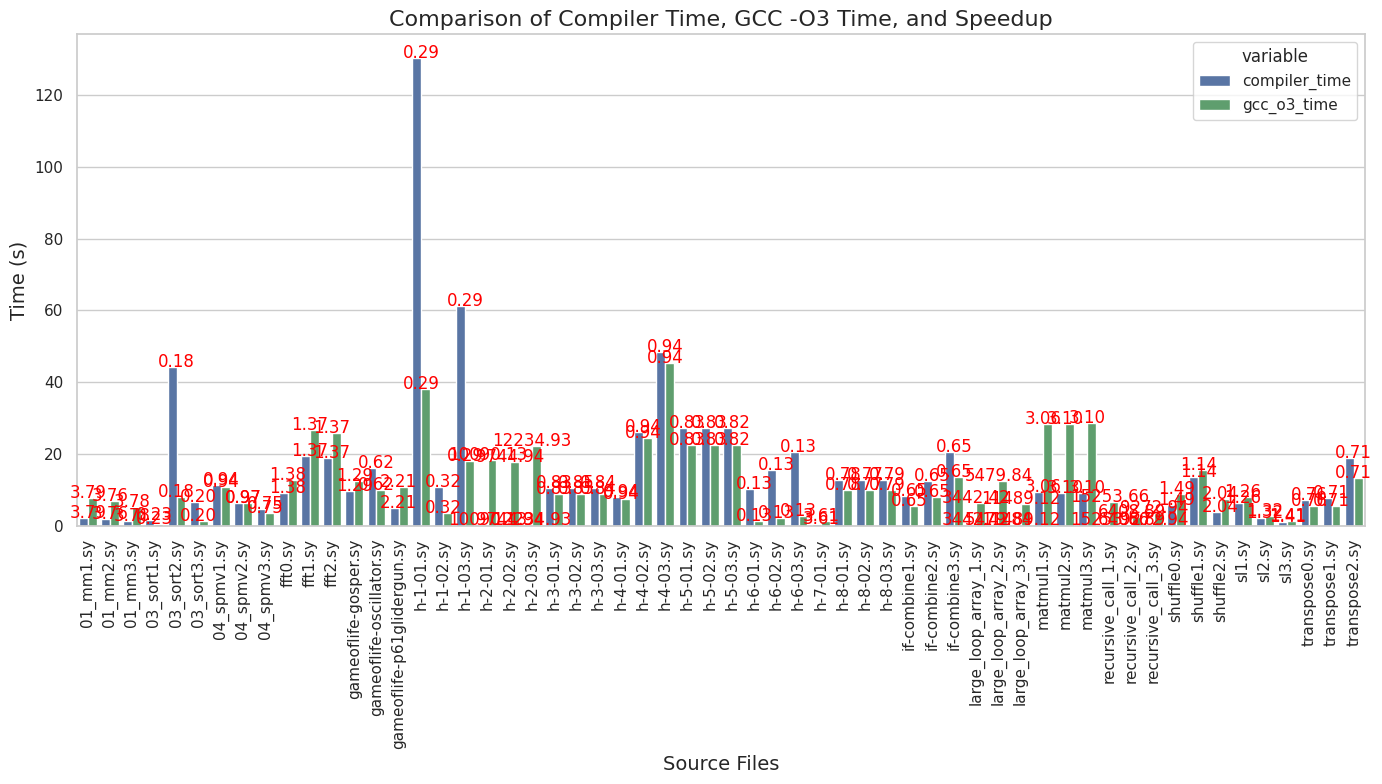

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('2024_08_21_03:44.csv')

# Filter out rows with src names starting with "recursive_call", "h1-", etc.
excluded_prefixes = ["recursive_call", "h1-"]
filtered_data = data[~data['src'].apply(lambda x: any(x.startswith(prefix) for prefix in excluded_prefixes))]

# Extract the file names from the 'src' column for better readability in the plot
filtered_data['file_name'] = filtered_data['src'].apply(lambda x: x.split('/')[-1])

# Set up the seaborn style
sns.set(style="whitegrid")

# Create the bar plot for compiler_time and gcc_o3_time
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x="file_name", y="value", hue="variable",
                       data=pd.melt(filtered_data[['file_name', 'compiler_time', 'gcc_o3_time']], 
                                    id_vars=['file_name']),
                       palette=["b", "g"])

# Add speedup values as labels on the plot
for index, row in filtered_data.iterrows():
    bar_plot.text(index, row['compiler_time'], f"{row['speedup']:.2f}", color='red', ha="center")
    bar_plot.text(index, row['gcc_o3_time'], f"{row['speedup']:.2f}", color='red', ha="center")

# Customize labels and title
bar_plot.set_xlabel('Source Files', fontsize=14)
bar_plot.set_ylabel('Time (s)', fontsize=14)
bar_plot.set_title('Comparison of Compiler Time, GCC -O3 Time, and Speedup', fontsize=16)
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

